In [10]:
ucrn_ng15='/home/subhajit/Desktop/PTA_comp/PPTA_NG_EPTA/PPTA_NG_EPTA_UCRN/ng15_powerlaw_CRN/'
trim_epta='/home/subhajit/Desktop/EPTA_comparison/trim/epta-gwb-search-chains_new_sys_v1.3_trim/chains_ep_chen/crn_pl/'
full_epta='/home/subhajit/Desktop/EPTA_comparison/full/epta-gwb-search-chains_v1.3/chains_ep_chen/crn_pl/'

In [11]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/home/subhajit/Desktop/EPTA_comparison/notebooks')
from diff_chain import  Diff_chain_shift

In [38]:
par_ng=pd.read_csv(ucrn_ng15+'pars.txt', header = None)
len_ng=len(par_ng)
#par_ng

In [17]:
par_trim=pd.read_csv(trim_epta+'pars.txt', header = None)
lt=len(par_trim)
#par_trim

In [19]:
trim_1=np.loadtxt(trim_epta+'chain_1.txt',usecols=(lt-1,lt-2,-4))

In [28]:
ng15_1=np.loadtxt(ucrn_ng15+'chain_1.0.txt',usecols=(len_ng-1,len_ng-2,-3))

In [31]:
par_full=pd.read_csv(full_epta+'pars.txt', header = None)
lf=len(par_full)
#par_full

In [33]:
full_1=np.loadtxt(full_epta+'chain_1.txt',usecols=(lf-1,lf-2,-4))

In [35]:
full=full_1.T[0:2];trim=trim_1.T[0:2];ng15=ng15_1.T[0:2]

In [25]:
names_red = ['logA_R','gamma_R']
labels_red=['\log A_{R}','\gamma_{R}']
del_names=['delta_logA_R','delta_gamma_R']

In [36]:
trim_red=MCSamples(samples=np.array(trim).transpose(),loglikes=trim_1.T[-1],names=names_red,labels=labels_red,label='EPTA TRIM')
ng_15red=MCSamples(samples=np.array(ng15).transpose(),loglikes=ng15_1.T[-1],names = names_red,labels=labels_red,label='NG15')
full_red=MCSamples(samples=np.array(full).transpose(),loglikes=full_1.T[-1],names = names_red,labels=labels_red,label='FULL')

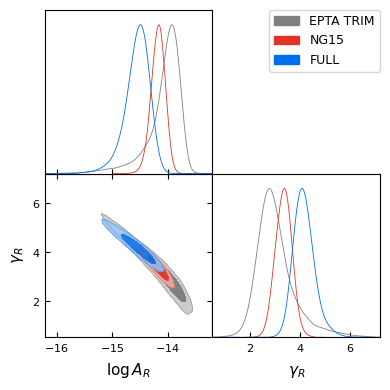

In [37]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([trim_red,ng_15red,full_red], filled=True)
#plt.savefig('trimvsfull_'+term+'.png',dpi=300)
plt.show()

In [39]:
diff_chain_trimvng, nsig_trimvng,sigl_trimvng,sigu_trimvng=Diff_chain_shift(trim_red,ng_15red)

In [40]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2,off_size)
    shift_probability=utilities.from_sigma_to_confidence(nsig)
    # plot the contour for a sanity check:
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    #plt.savefig(A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability

(<getdist.mcsamples.MCSamples at 0x7fc0b42487c0>, 0.3309511902380476)

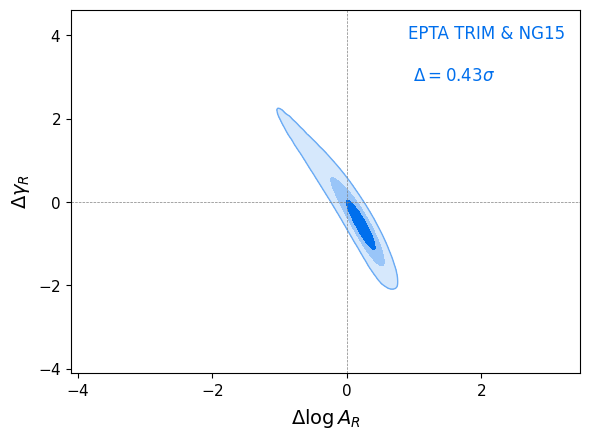

In [41]:
plot_diff_chain(trim_red,ng_15red,lims=)

(<getdist.mcsamples.MCSamples at 0x7fc0ae688430>, 0.6564326865373074)

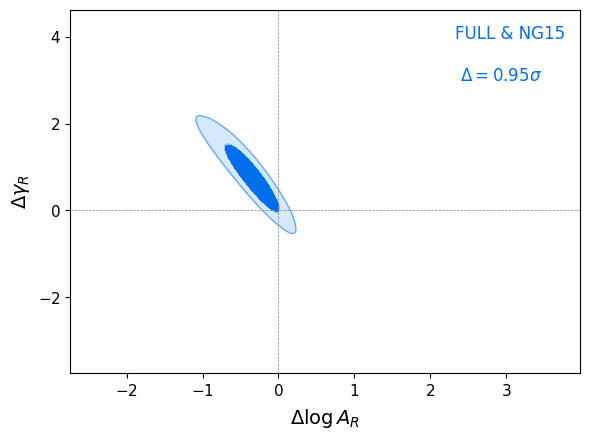

In [42]:
plot_diff_chain(full_red,ng_15red)